In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#Linear Algebra
import numpy as np
#Data preprocessing
import pandas as pd
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#Catboost Classifier Algorithm
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')
#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

import os
import copy
from sklearn.metrics import mean_absolute_error
from collections import defaultdict
import lightgbm as lgb
import time
from collections import Counter
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit, RepeatedStratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import datetime as dt
import gc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
import re
from numba import jit
from collections import defaultdict, Counter
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/joojhfd/x2x1.csv
/kaggle/input/joojhfd/cv3.csv
/kaggle/input/joojhfd/cv6.csv
/kaggle/input/dscmeetup3/CustomerInfo.csv
/kaggle/input/dscmeetup3/testdata.csv
/kaggle/input/dscmeetup3/buyscooter.csv


/kaggle/input/joojhfd/x2x1.csv
/kaggle/input/joojhfd/cv3.csv
/kaggle/input/joojhfd/cv6.csv
/kaggle/input/dscmeetup3/CustomerInfo.csv
/kaggle/input/dscmeetup3/testdata.csv
/kaggle/input/dscmeetup3/buyscooter.csv


> READ DATASET********

In [2]:
buy_scooter =pd.read_csv('/kaggle/input/dscmeetup3/buyscooter.csv')
test =pd.read_csv('/kaggle/input/dscmeetup3/testdata.csv')
customer_info =pd.read_csv('/kaggle/input/dscmeetup3/CustomerInfo.csv');customer_info.sample(3)

,CustomerID,FirstName,MiddleName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
10012,22276,Gabriella,M,Gray,San Gabriel,California,United States,91776,133-555-0116,07/06/1965,Bachelors,Professional,F,S,0,1,0,0,63238
9187,21342,Tonya,S,Xie,Beverly Hills,California,United States,90210,966-555-0151,22/11/1938,Graduate Degree,Management,F,M,0,2,0,5,91010
5337,16987,Miguel,D,Clark,Port Hammond,British Columbia,Canada,V6B 3P7,188-555-0182,09/04/1965,Bachelors,Skilled Manual,M,S,1,2,3,3,122790


DATA PREPARATION

In [3]:
#merging customer info and buy scooters to inherit the target column by ID's
train = pd.merge(customer_info,buy_scooter,how = 'left',on = ['CustomerID']);train.head()

,CustomerID,FirstName,MiddleName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter
0,11000,Jon,V,Yang,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,Eugene,L,Huang,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,Ruben,NaN,Torres,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,Christy,NaN,Zhu,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,Elizabeth,NaN,Johnson,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [4]:
train.isnull().sum()

CustomerID                 0
FirstName                  0
MiddleName              6122
LastName                   0
City                       0
StateProvinceName          0
CountryRegionName          0
PostalCode                 0
PhoneNumber                0
BirthDate                  0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
BuyScooter                 0
dtype: int64

In [5]:
test.isnull().sum()

CustomerID                0
FirstName                 0
MiddleName              829
LastName                  0
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
dtype: int64

In [6]:
train =train.drop(['MiddleName','CustomerID'] , axis=True)

test =test.drop(['MiddleName','CustomerID'] , axis=True)

In [7]:
dtypes_group = train.columns.to_series().groupby(train.dtypes).groups;dtypes_group

{dtype('int64'): Index(['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
        'TotalChildren', 'YearlyIncome', 'BuyScooter'],
       dtype='object'),
 dtype('O'): Index(['FirstName', 'LastName', 'City', 'StateProvinceName',
        'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
        'Education', 'Occupation', 'Gender', 'MaritalStatus'],
       dtype='object')}

In [8]:
train['City_count'] = train['City'].map(Counter(train['City']))
train['LastName_count'] = train['LastName'].map(Counter(train['LastName']))
train['PhoneNumber_count'] = train['PhoneNumber'].map(Counter(train['PhoneNumber']))

In [9]:
test['City_count'] = test['City'].map(Counter(test['City']))
test['LastName_count'] = test['LastName'].map(Counter(test['LastName']))
test['PhoneNumber_count'] = test['PhoneNumber'].map(Counter(test['PhoneNumber']))

UNIVARIATE ANALYSIS - FIRSTNAME/LAST NAME

Comments: Literally, in this kind of task names has nothing to do with our prediction; but lets explore one single variable [lastname column only] to see if a family or same name exist wrt to firstname

In [10]:
train[train['LastName'] == 'Huang']

,FirstName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,City_count,LastName_count,PhoneNumber_count
1,Eugene,Huang,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,1,68,58,99
196,Erica,Huang,Colma,California,United States,94014,618-555-0157,23/02/1950,Partial College,Professional,F,M,1,1,1,2,98934,0,131,58,1
422,Alejandro,Huang,South Melbourne,Victoria,Australia,3205,1 (11) 500 555-0112,16/11/1971,Bachelors,Professional,M,M,1,4,0,0,130431,0,55,58,138
470,Shannon,Huang,Burbank,California,United States,91502,458-555-0116,25/02/1954,High School,Clerical,F,M,1,1,0,1,23306,0,145,58,2
524,Trisha,Huang,Pantin,Seine Saint Denis,France,93500,1 (11) 500 555-0128,08/11/1964,Partial High School,Manual,F,S,1,2,2,3,21200,0,49,58,61
848,Dawn,Huang,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0154,27/02/1949,Partial High School,Clerical,F,M,1,2,1,2,33975,0,76,58,71
850,Dennis,Huang,Concord,California,United States,94519,183-555-0120,11/09/1980,Partial College,Skilled Manual,M,M,0,2,0,0,22715,0,161,58,1
856,Lacey,Huang,Melbourne,Victoria,Australia,3000,1 (11) 500 555-0121,06/08/1952,Partial College,Skilled Manual,F,M,1,2,0,2,45231,0,80,58,70
1116,Amy,Huang,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0197,22/11/1980,Bachelors,Clerical,F,M,1,0,0,0,37907,0,60,58,61
1315,Todd,Huang,Cheltenham,England,United Kingdom,GL50,1 (11) 500 555-0114,23/11/1968,Graduate Degree,Clerical,M,M,1,0,0,0,67903,0,39,58,150


UNIVARIATE ANALYSIS - CITY

In [11]:
train['City'].value_counts().to_frame()

,City
London,334
Paris,289
Beaverton,171
Bellingham,170
Burien,163
Concord,161
Chula Vista,157
Berkeley,155
Beverly Hills,153
Burbank,145


In [12]:
test['City'].value_counts().to_frame()

,City
Paris,52
London,45
Burbank,29
Chula Vista,28
Burien,25
Cliffside,25
Burlingame,24
Bremerton,24
Bellflower,23
Coronado,23


Comment: there are some hidden pattern that cant be pitched out here.. lets explore the country and state region to know what to do city column

UNIVARIATE ANALYSIS - StateProvinceName

In [13]:
train['StateProvinceName'].value_counts().to_frame()

,StateProvinceName
California,3451
Washington,1779
England,1526
New South Wales,1210
British Columbia,1203
Oregon,812
Victoria,703
Queensland,613
Saarland,347
Nordrhein-Westfalen,321


In [14]:
test['StateProvinceName'].value_counts().to_frame()

,StateProvinceName
California,497
Washington,238
British Columbia,185
England,183
New South Wales,166
Oregon,122
Queensland,100
Victoria,98
Seine (Paris),52
Hamburg,42


#COMMENT: Majority of the consumers lives in USA;  what could cause his trend? may the scooters company is based in USA; cant say.. lets keep exploring this might be a good feature

UNIVARIATE ANALYSIS -  	CountryRegionName

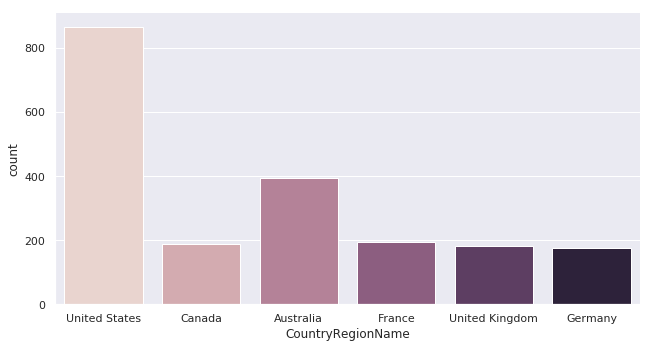

In [15]:
sns.catplot(x="CountryRegionName", kind="count", palette="ch:.01",aspect=1.8, data=test);

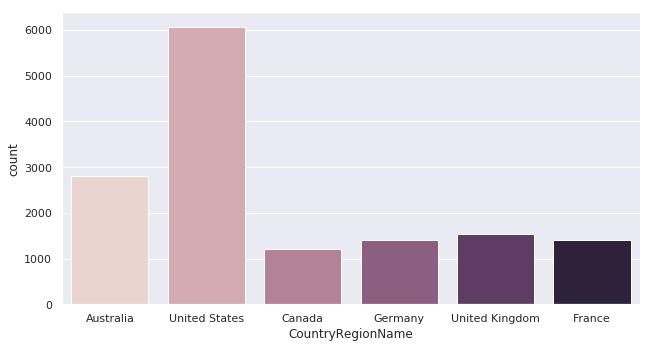

In [16]:
sns.catplot(x="CountryRegionName", kind="count", palette="ch:.01",aspect=1.8, data=train);

UNIVARIATE ANALYSIS -PhoneNumber

In [17]:
train['PhoneNumber'].value_counts().to_frame()

,PhoneNumber
1 (11) 500 555-0118,166
1 (11) 500 555-0115,153
1 (11) 500 555-0114,150
1 (11) 500 555-0113,147
1 (11) 500 555-0119,143
1 (11) 500 555-0117,142
1 (11) 500 555-0111,139
1 (11) 500 555-0112,138
1 (11) 500 555-0116,130
1 (11) 500 555-0110,99


In [18]:
test['PhoneNumber'].value_counts().to_frame()

,PhoneNumber
1 (11) 500 555-0116,28
1 (11) 500 555-0111,25
1 (11) 500 555-0113,23
1 (11) 500 555-0117,22
1 (11) 500 555-0112,20
1 (11) 500 555-0114,18
1 (11) 500 555-0118,18
1 (11) 500 555-0119,18
1 (11) 500 555-0179,17
1 (11) 500 555-0145,16


In [19]:
train[train['PhoneNumber'] == '1 (11) 500 555-0173']

,FirstName,LastName,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BuyScooter,City_count,LastName_count,PhoneNumber_count
326,Cindy,Ramos,Newcastle,New South Wales,Australia,2300,1 (11) 500 555-0173,28/04/1977,High School,Manual,F,M,1,2,0,0,11376,0,57,73,69
1197,Andres,Nara,Paris,Seine (Paris),France,75003,1 (11) 500 555-0173,10/08/1948,High School,Management,M,M,1,3,1,4,120126,1,289,75,69
1512,Marshall,Li,Coffs Harbour,New South Wales,Australia,2450,1 (11) 500 555-0173,20/04/1972,Bachelors,Professional,M,S,0,3,0,0,131912,1,80,75,69
1548,Kurt,Goel,Ingolstadt,Bayern,Germany,85049,1 (11) 500 555-0173,19/02/1980,Partial High School,Manual,M,S,0,2,0,0,13079,0,45,77,69
1553,Todd,Guo,Orleans,Loiret,France,45000,1 (11) 500 555-0173,21/02/1972,Partial High School,Manual,M,S,1,2,0,0,24033,0,47,54,69
1564,Juan,Torres,Bury,England,United Kingdom,PE17,1 (11) 500 555-0173,18/04/1971,Partial High School,Manual,M,S,0,2,0,0,23268,0,46,143,69
1636,Russell,Raje,Saint-Denis,Seine Saint Denis,France,93400,1 (11) 500 555-0173,24/12/1964,High School,Manual,M,S,1,0,3,3,30411,1,43,81,69
1671,Janelle,Fernandez,Paris,Seine (Paris),France,75006,1 (11) 500 555-0173,18/06/1975,Partial High School,Manual,F,S,1,2,0,0,27167,0,289,69,69
1886,Gregory,Becker,Darlinghurst,New South Wales,Australia,2010,1 (11) 500 555-0173,12/04/1963,Bachelors,Professional,M,S,0,1,0,0,96830,1,58,21,69
2243,Joel,Mehta,Dunkerque,Nord,France,59140,1 (11) 500 555-0173,09/04/1962,Graduate Degree,Clerical,M,S,1,0,0,4,65258,0,42,75,69


#high yearly income conribute

observation: the same phone number but different lastname/lastname, 'CountryRegionName'; phonenumber must be a data error..
had it been we could trace the phone number via the last name or country we could say they are family and they decided to put a single number down, but such instances never exist
delete the column

In [20]:
train['PhoneNumber'].value_counts()

1 (11) 500 555-0118    166
1 (11) 500 555-0115    153
1 (11) 500 555-0114    150
1 (11) 500 555-0113    147
1 (11) 500 555-0119    143
1 (11) 500 555-0117    142
1 (11) 500 555-0111    139
1 (11) 500 555-0112    138
1 (11) 500 555-0116    130
1 (11) 500 555-0110     99
1 (11) 500 555-0169     93
1 (11) 500 555-0174     87
1 (11) 500 555-0180     86
1 (11) 500 555-0131     85
1 (11) 500 555-0161     85
1 (11) 500 555-0191     85
1 (11) 500 555-0164     83
1 (11) 500 555-0147     82
1 (11) 500 555-0125     82
1 (11) 500 555-0182     81
1 (11) 500 555-0188     81
1 (11) 500 555-0146     80
1 (11) 500 555-0139     79
1 (11) 500 555-0157     78
1 (11) 500 555-0184     78
1 (11) 500 555-0124     78
1 (11) 500 555-0194     78
1 (11) 500 555-0127     77
1 (11) 500 555-0148     77
1 (11) 500 555-0177     77
1 (11) 500 555-0176     77
1 (11) 500 555-0159     76
1 (11) 500 555-0162     76
1 (11) 500 555-0168     76
1 (11) 500 555-0178     75
1 (11) 500 555-0193     75
1 (11) 500 555-0143     74
1

UNIVARIATE ANALYSIS -BIRTHDATE

In [21]:
train['BirthDate'].value_counts().to_frame()

,BirthDate
18/03/1966,9
06/09/1971,8
07/11/1975,8
24/06/1962,8
12/05/1964,8
02/04/1965,8
22/06/1947,8
26/08/1957,8
18/10/1973,8
23/10/1970,7


In [22]:
test['BirthDate'].value_counts().to_frame()

,BirthDate
12/12/1969,3
14/05/1967,3
04/07/1967,3
23/03/1961,3
09/09/1970,3
04/10/1974,3
03/09/1958,3
22/05/1960,3
02/06/1963,3
13/11/1961,3


In [23]:
train['datetime']=pd.to_datetime(train['BirthDate'])
test['datetime']=pd.to_datetime(test['BirthDate'])

In [24]:
train["year"]=train["datetime"].dt.year
test["year"]=test["datetime"].dt.year

In [25]:
train=train.drop(['datetime','BirthDate'], axis=1)
test=test.drop(['datetime','BirthDate'], axis=1)

UNIVARIATE ANALYSIS -Age

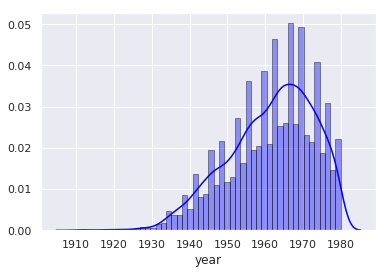

In [26]:
sns.distplot(train['year'], hist=True, kde=True, color = 'blue', hist_kws={'edgecolor':'black'})

#Comment: since there is a variation in age chart, lets classify them to have a new feature whic could help in extracting some hidden patterns wrt to byscooters or not

#continue analysis here

UNIVARIATE ANALYSIS -MaritalStatus

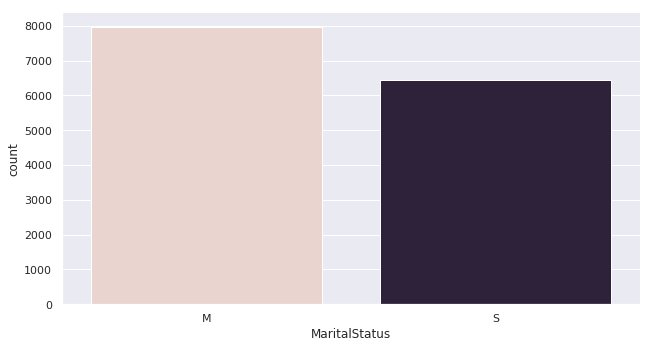

In [27]:
sns.catplot(x="MaritalStatus", kind="count", palette="ch:.01",aspect=1.8, data=train);

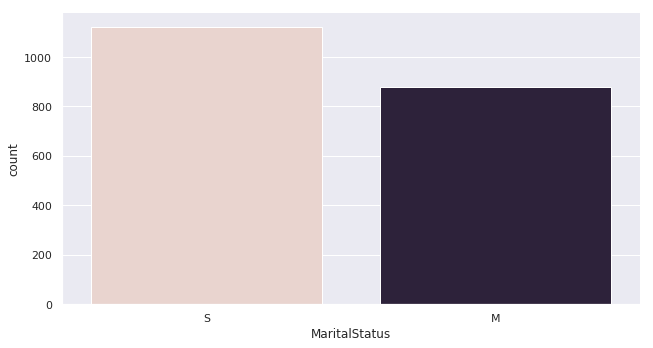

In [28]:
sns.catplot(x="MaritalStatus", kind="count", palette="ch:.01",aspect=1.8, data=test);

UNIVARIATE ANALYSIS - Education

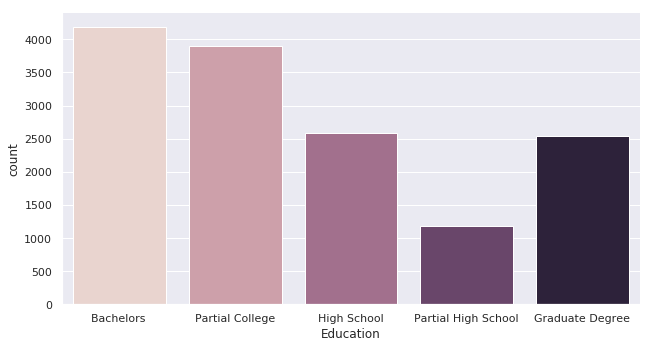

In [29]:
sns.catplot(x="Education", kind="count", palette="ch:.01",aspect=1.8, data=train);

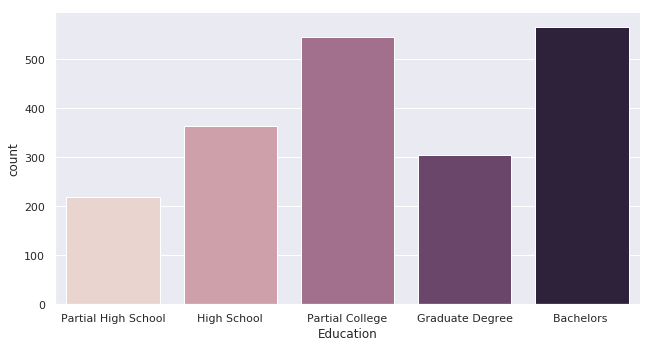

In [30]:
sns.catplot(x="Education", kind="count", palette="ch:.01",aspect=1.8, data=test);

UNIVARIATE ANALYSIS - OCCUPATION

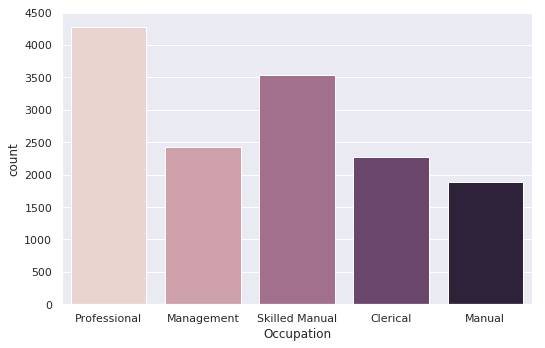

In [31]:
sns.catplot(x="Occupation", kind="count", palette="ch:.01",aspect=1.5, data=train);

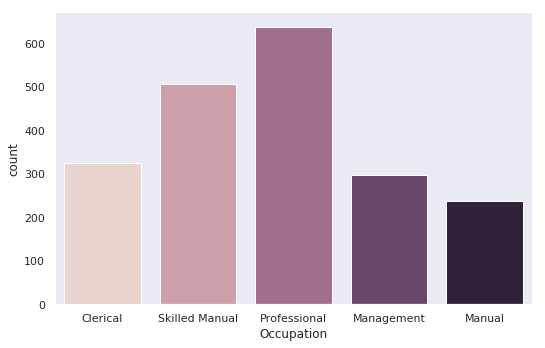

In [32]:
sns.set_style("dark")

sns.catplot(x="Occupation", kind="count", palette="ch:.01",aspect=1.5, data=test);

In [33]:
test['Occupation'].unique()

array(['Clerical', 'Skilled Manual', 'Professional', 'Management',
       'Manual'], dtype=object)

Comment: Lets reduce the distribution of the data points by renaming skilled manual and manual as a single occupation [ Skilled Manual/Manual ]

In [34]:
test['Occupation'].replace({'Skilled Manual': 'Skilled Manual/Manual','Manual': 'Skilled Manual/Manual'}, inplace=True)
train['Occupation'].replace({'Skilled Manual': 'Skilled Manual/Manual','Manual': 'Skilled Manual/Manual'}, inplace=True)

UNIVARIATE ANALYSIS - GENDER

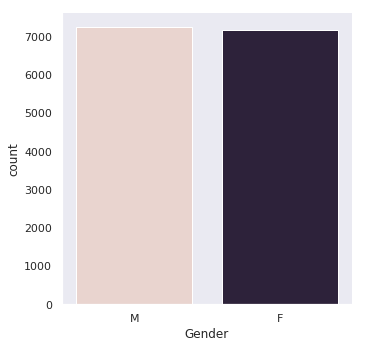

In [35]:
sns.catplot(x="Gender", kind="count", palette="ch:.01", data=train);

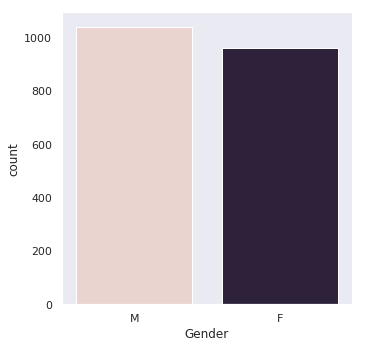

In [36]:
sns.catplot(x="Gender", kind="count", palette="ch:.01", data=test);

UNIVARIATE ANALYSIS - MARITAL STATUS

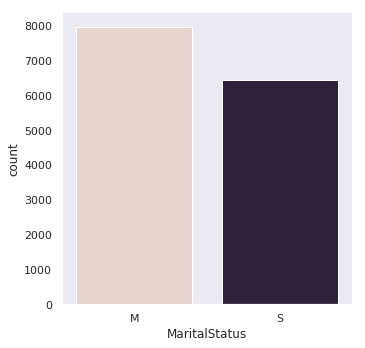

In [37]:
sns.catplot(x="MaritalStatus", kind="count", palette="ch:.01", data=train);

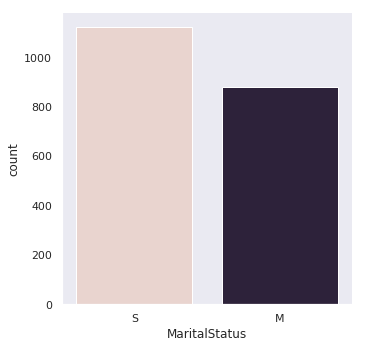

In [38]:
sns.catplot(x="MaritalStatus", kind="count", palette="ch:.01", data=test);

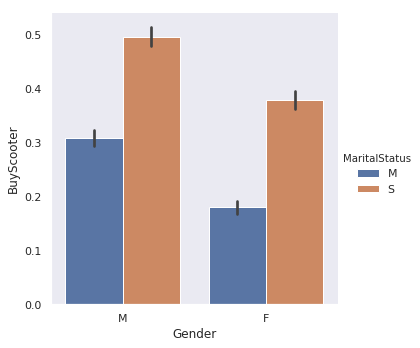

In [39]:
sns.catplot(x="Gender", y="BuyScooter", hue="MaritalStatus", kind="bar", data=train);

In [40]:
train['not_customer_children'] =train['TotalChildren'] - train['NumberChildrenAtHome']
test['not_customer_children'] =test['TotalChildren'] - test['NumberChildrenAtHome'] 

In [41]:
print(test['YearlyIncome'].min(), test['YearlyIncome'].max())

10165 190466


In [42]:
bins = [9000,50000, 100000, 200000]
labels = [1,2,3]
train['cat_income'] = pd.cut(train['YearlyIncome'], bins=bins, labels=labels)


In [43]:
bins = [9000,50000, 100000, 200000]
labels = [1,2,3]
test['cat_income'] = pd.cut(test['YearlyIncome'], bins=bins, labels=labels)

In [44]:
train['Occupation_count'] = train['Occupation'].map(Counter(train['Occupation']))
test['Occupation_count'] = test['Occupation'].map(Counter(test['Occupation']))

In [45]:

def nochild(x):
    if x == 0:
        return 0
    else:
        return 1
train['no_childbind'] =train['NumberChildrenAtHome'].apply(nochild)
newbin = train[['NumberChildrenAtHome','no_childbind' ]]



In [46]:

def nochildx(x):
    if x == 0:
        return 0
    else:
        return 1
test['no_childbind'] =test['NumberChildrenAtHome'].apply(nochildx)
newbinx = test[['NumberChildrenAtHome','no_childbind' ]]


In [47]:
def kdeplot(feature):
    facet =sns.FacetGrid(train, hue='BuyScooter', aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(train[feature].min() ,train[feature].max()))
    facet.add_legend()

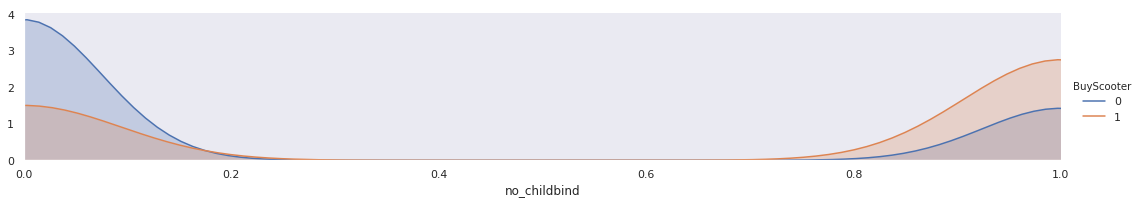

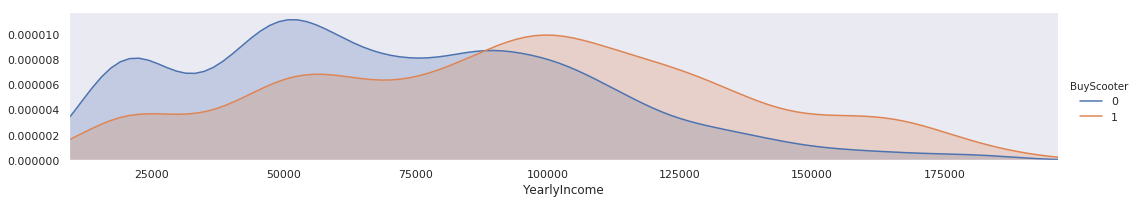

In [48]:
kdeplot('no_childbind')
kdeplot('YearlyIncome')

In [49]:
def chd(train):
    if train.no_childbind >2.3:
        return 'tobuy'
    elif train.no_childbind >1.59 and train.no_childbind <2.3:
        return 'ntobuy1'
    elif train.no_childbind >=0 and train.no_childbind <0.41:
        return 'ntobuy2'
    else:
        return 'ntball'
train['no-child_buy'] = train.apply(lambda train:chd(train), axis=1)

In [50]:
def chdx(test):
    if test.no_childbind >2.3:
        return 'tobuy'
    elif test.no_childbind >1.59 and test.no_childbind <2.3:
        return 'ntobuy1'
    elif test.no_childbind >=0 and test.no_childbind <0.41:
        return 'ntobuy2'
    else:
        return 'ntball'
test['no-child_buy'] = test.apply(lambda test:chdx(test), axis=1)

In [51]:
def lncx(test):
    if test.YearlyIncome > 85000:
        return 'High'
    else:
        return 'low'
test['class_income'] = test.apply(lambda test:lncx(test), axis=1)

In [52]:
def lnc(train):
    if train.YearlyIncome > 85000:
        return 'High'
    else:
        return 'low'
train['class_income'] = train.apply(lambda train:lnc(train), axis=1)

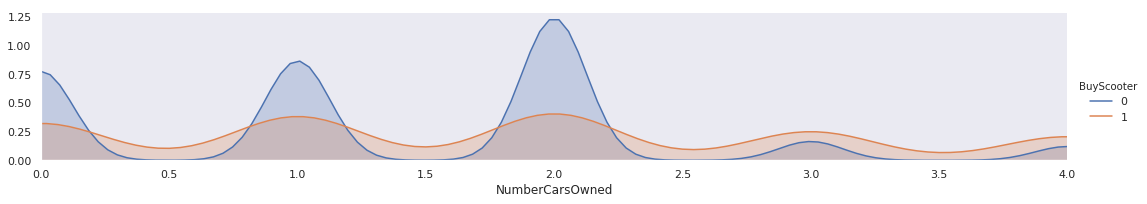

In [53]:
kdeplot('NumberCarsOwned')

In [54]:
def carx(test):
    if test.NumberCarsOwned == 0:
        return 'tobuyc'
    elif test.NumberCarsOwned == 1:
        return 'tobuyc'
    elif test.NumberCarsOwned == 2:
        return 'tobuyc'
    else:
        return 'ntbuyc'
test['wcar_buy'] = test.apply(lambda test:carx(test), axis=1)

In [55]:
def car(train):
    if train.NumberCarsOwned == 0:
        return 'tobuyc'
    elif train.NumberCarsOwned == 1:
        return 'tobuyc'
    elif train.NumberCarsOwned == 2:
        return 'tobuyc'
    else:
        return 'ntbuyc'
train['wcar_buy'] = train.apply(lambda train:car(train), axis=1)

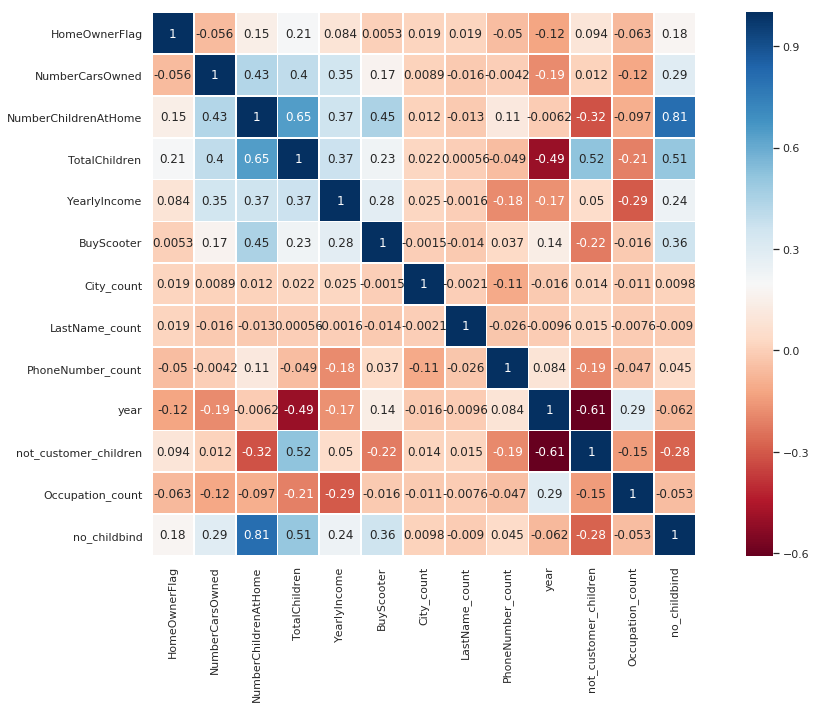

In [56]:
#plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, square=True, annot=True, linewidth=0.8, cmap='RdBu')

In [57]:
train.columns

Index(['FirstName', 'LastName', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BuyScooter', 'City_count', 'LastName_count',
       'PhoneNumber_count', 'year', 'not_customer_children', 'cat_income',
       'Occupation_count', 'no_childbind', 'no-child_buy', 'class_income',
       'wcar_buy'],
      dtype='object')

In [58]:

train = train[['LastName', 'City',
       'CountryRegionName', 'PhoneNumber', 'Education',
       'Occupation', 'Gender', 'MaritalStatus',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BuyScooter',
       'PhoneNumber_count', 'year', 'not_customer_children', 'cat_income',
       'Occupation_count', 'no_childbind', 'no-child_buy', 'class_income',
       'wcar_buy']]

In [59]:
test= test[['LastName', 'City',
       'CountryRegionName', 'PhoneNumber', 'Education',
       'Occupation', 'Gender', 'MaritalStatus',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 
       'PhoneNumber_count', 'year', 'not_customer_children', 'cat_income',
       'Occupation_count', 'no_childbind', 'no-child_buy', 'class_income',
       'wcar_buy']]

In [60]:
#train = pd.get_dummies(train, columns =['MaritalStatus', 'no-child_buy','class_income','cat_income'] ,drop_first=True)

In [61]:
#test = pd.get_dummies(test, columns =['MaritalStatus', 'no-child_buy','class_income','cat_income'] ,drop_first=True)

In [62]:
train.dtypes

LastName                   object
City                       object
CountryRegionName          object
PhoneNumber                object
Education                  object
Occupation                 object
Gender                     object
MaritalStatus              object
NumberCarsOwned             int64
NumberChildrenAtHome        int64
TotalChildren               int64
YearlyIncome                int64
BuyScooter                  int64
PhoneNumber_count           int64
year                        int64
not_customer_children       int64
cat_income               category
Occupation_count            int64
no_childbind                int64
no-child_buy               object
class_income               object
wcar_buy                   object
dtype: object

In [63]:
x = train.drop('BuyScooter', axis =1)
y = train.BuyScooter

In [64]:
cate_features_index = np.where(x.dtypes != float)[0];cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
import xgboost as xgb
from catboost import Pool, CatBoostClassifier, cv

In [68]:
model = CatBoostClassifier(iterations=1500, depth=4, learning_rate=0.009,eval_metric='Accuracy',use_best_model=True, random_seed=42)
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.7668055	test: 0.7649236	best: 0.7649236 (0)	total: 96.3ms	remaining: 2m 24s
1:	learn: 0.7850200	test: 0.7899121	best: 0.7899121 (1)	total: 128ms	remaining: 1m 35s
2:	learn: 0.7845299	test: 0.7913003	best: 0.7913003 (2)	total: 150ms	remaining: 1m 14s
3:	learn: 0.7861635	test: 0.7917631	best: 0.7917631 (3)	total: 182ms	remaining: 1m 8s
4:	learn: 0.7807727	test: 0.7843591	best: 0.7917631 (3)	total: 204ms	remaining: 1m
5:	learn: 0.7797109	test: 0.7783434	best: 0.7917631 (3)	total: 226ms	remaining: 56.3s
6:	learn: 0.7834681	test: 0.7848218	best: 0.7917631 (3)	total: 244ms	remaining: 52.1s
7:	learn: 0.7864902	test: 0.7889866	best: 0.7917631 (3)	total: 265ms	remaining: 49.4s
8:	learn: 0.7816712	test: 0.7866728	best: 0.7917631 (3)	total: 285ms	remaining: 47.2s
9:	learn: 0.7815078	test: 0.7852846	best: 0.7917631 (3)	total: 303ms	remaining: 45.2s
10:	learn: 0.7828147	test: 0.7866728	best: 0.7917631 (3)	total: 327ms	remaining: 44.2s
11:	learn: 0.7824880	test: 0.7862101	best: 0.7917631

In [69]:
pred =model.predict(test)
pred = pred.astype(np.int)

In [70]:
testx =pd.read_csv('/kaggle/input/dscmeetup3/testdata.csv')

In [71]:
xfinal =pd.DataFrame({'CustomerID': testx['CustomerID']})

In [72]:
yfinal = pd.DataFrame ({'BuyScooter' :pred})

In [73]:
submission =pd.concat([xfinal, yfinal], axis ='columns')
submission.head()

,CustomerID,BuyScooter
0,27219,0
1,27220,0
2,27221,0
3,27222,0
4,27223,0


In [74]:
submission['BuyScooter'].value_counts()#must go below 533

0    1492
1     508
Name: BuyScooter, dtype: int64

In [75]:
submission.to_csv('submit1t.csv', index =False)

STRATIFIEDFOLD

In [76]:
#best score 0.90801 focr classic csv
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
fold=StratifiedKFold(n_splits=6, shuffle=True, random_state=42)#8splits #2001
i=1
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m= CatBoostClassifier(eval_metric="F1",iterations=800, depth=4, learning_rate=0.03)
    m.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest), early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb.append(roc_auc_score(y_test,preds))
    p = m.predict(test)
    y_pred_totcb.append(p)

0:	learn: 0.6223285	test: 0.6433022	best: 0.6433022 (0)	total: 30.6ms	remaining: 24.4s
100:	learn: 0.6565544	test: 0.6820276	best: 0.6851852 (92)	total: 2.42s	remaining: 16.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6851851852
bestIteration = 92

Shrink model to first 93 iterations.
err:  0.8663792225135937
0:	learn: 0.6223285	test: 0.6433022	best: 0.6433022 (0)	total: 30.1ms	remaining: 24.1s
100:	learn: 0.6565544	test: 0.6820276	best: 0.6851852 (92)	total: 2.53s	remaining: 17.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6851851852
bestIteration = 92

Shrink model to first 93 iterations.
err:  0.8571606588931611
0:	learn: 0.6223285	test: 0.6433022	best: 0.6433022 (0)	total: 29.4ms	remaining: 23.5s
100:	learn: 0.6565544	test: 0.6820276	best: 0.6851852 (92)	total: 2.79s	remaining: 19.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6851851852
bestIteration = 92

Shrink model to first 93 iterations.
err:  0.870

In [77]:
len(test)

2000

In [78]:
len(np.mean(y_pred_totcb, 0))

2000

In [79]:
np.mean(errcb)

0.8625612856082908

In [80]:
test_i =pd.read_csv('/kaggle/input/dscmeetup3/testdata.csv')

In [81]:
sub = test_i['CustomerID']

In [82]:
final = np.mean(y_pred_totcb, 0)

In [83]:
df = pd.DataFrame(final, columns=['pred'])

In [84]:
df['pred'].value_counts()

0.0    1490
1.0     510
Name: pred, dtype: int64

In [85]:
DFpred = pred.astype(np.int)

In [86]:
d = {"CustomerID": sub, 'BuyScooter': df['pred']}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["CustomerID", 'BuyScooter']].to_csv("final43.csv",index=False)

In [87]:
ids = pd.DataFrame(sub, columns=['CustomerID'])

In [88]:
testx =pd.read_csv('/kaggle/input/dscmeetup3/testdata.csv')

In [89]:
a = pd.read_csv('/kaggle/input/joojhfd/x2x1.csv')
b = pd.read_csv('/kaggle/input/joojhfd/cv3.csv')
c = pd.read_csv('/kaggle/input/joojhfd/cv6.csv')

In [90]:
testx['BuyScooter']=a['BuyScooter']*0.90 +b['BuyScooter']*0.10

In [91]:
sub = testx['CustomerID']

In [92]:
d = {"CustomerID": sub, 'BuyScooter':testx['BuyScooter']}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["CustomerID", 'BuyScooter']].to_csv("stk2.csv",index=False)

In [93]:
d['BuyScooter'].value_counts()

0.0    1452
1.0     511
0.1      24
0.9      13
Name: BuyScooter, dtype: int64